In [2]:
import astropy.io.fits as pf
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt


#from matplotlib.backends.backend_pdf import PdfPages


In [4]:
file_name = "/Users/plazas/Documents/TNO_KPO/y6_res.fits"
plt.rcParams.update({'figure.max_open_warning': 0})

"""
ColDefs(
    name = 'ABG'; format = '6D'; dim = '(6)'
    name = 'ABGINVCOV'; format = '36D'; dim = '(36)'
    name = 'ARC'; format = 'D'
    name = 'ARCCUT'; format = 'D'
    name = 'CHANGED'; format = 'L'
    name = 'CHISQ'; format = 'D'
    name = 'ELEMENTCOV'; format = '36D'; dim = '(36)'
    name = 'ELEMENTS'; format = '6D'; dim = '(6)'
    name = 'FPR'; format = 'D'
    name = 'FRAME'; format = '7D'; dim = '(7)'
    name = 'GROUP'; format = 'J'; null = 999999
    name = 'MAXOVERLAP'; format = 'J'; null = 999999
    name = 'NDETECT'; format = 'J'; null = 999999
    name = 'NUNIQUE'; format = 'J'; null = 999999
    name = 'OLDID'; format = 'K'; null = 999999
    name = 'OVERLAP'; format = 'L'
    name = 'XV'; format = '6D'; dim = '(6)'
    name = 'XVINVCOV'; format = '36D'; dim = '(36)'
    name = 'ORBITID'; format = 'K'; null = 999999
    name = 'EQUIV'; format = 'K'; null = 999999
    name = 'a'; format = 'D'
    name = 'e'; format = 'D'
    name = 'q'; format = 'D'
    name = 'Class'; format = '24A'
    name = 'DIST'; format = 'D'
    name = 'i'; format = 'D'
    name = 'MPC'; format = '12A'
    name = 'FLUX_g'; format = 'D'
    name = 'FLUX_r'; format = 'D'
    name = 'FLUX_i'; format = 'D'
    name = 'FLUX_z'; format = 'D'
    name = 'FLUX_Y'; format = 'D'
    name = 'm_g'; format = 'D'
    name = 'm_r'; format = 'D'
    name = 'm_i'; format = 'D'
    name = 'm_z'; format = 'D'
    name = 'm_Y'; format = 'D'
    name = 'FLUX_ERR_g'; format = 'D'
    name = 'sigma_m_g'; format = 'D'
    name = 'FLUX_ERR_r'; format = 'D'
    name = 'sigma_m_r'; format = 'D'
    name = 'FLUX_ERR_i'; format = 'D'
    name = 'sigma_m_i'; format = 'D'
    name = 'FLUX_ERR_z'; format = 'D'
    name = 'sigma_m_z'; format = 'D'
    name = 'FLUX_ERR_Y'; format = 'D'
    name = 'sigma_m_Y'; format = 'D'
    name = 'd'; format = 'D'
    name = 'H_r'; format = 'D'
    name = 'r'; format = 'D'
    name = 'H_g'; format = 'D'
    name = 'H_i'; format = 'D'
    name = 'H_z'; format = 'D'
    name = 'H_Y'; format = 'D'
    name = 'CLASS'; format = '10A'
    name = 'p_res'; format = 'K'; null = 999999
    name = 'q_res'; format = 'K'; null = 999999
    name = 'amp'; format = 'D'
    name = 'mean'; format = 'D'
)
"""


"\nColDefs(\n    name = 'ABG'; format = '6D'; dim = '(6)'\n    name = 'ABGINVCOV'; format = '36D'; dim = '(36)'\n    name = 'ARC'; format = 'D'\n    name = 'ARCCUT'; format = 'D'\n    name = 'CHANGED'; format = 'L'\n    name = 'CHISQ'; format = 'D'\n    name = 'ELEMENTCOV'; format = '36D'; dim = '(36)'\n    name = 'ELEMENTS'; format = '6D'; dim = '(6)'\n    name = 'FPR'; format = 'D'\n    name = 'FRAME'; format = '7D'; dim = '(7)'\n    name = 'GROUP'; format = 'J'; null = 999999\n    name = 'MAXOVERLAP'; format = 'J'; null = 999999\n    name = 'NDETECT'; format = 'J'; null = 999999\n    name = 'NUNIQUE'; format = 'J'; null = 999999\n    name = 'OLDID'; format = 'K'; null = 999999\n    name = 'OVERLAP'; format = 'L'\n    name = 'XV'; format = '6D'; dim = '(6)'\n    name = 'XVINVCOV'; format = '36D'; dim = '(36)'\n    name = 'ORBITID'; format = 'K'; null = 999999\n    name = 'EQUIV'; format = 'K'; null = 999999\n    name = 'a'; format = 'D'\n    name = 'e'; format = 'D'\n    name = 'q'; 

In [3]:
data = pf.open(file_name)[1].data

mask_detached = (data['CLASS'] == 'Detached')
mask_scattered = (data['CLASS'] == 'Scattering')
mask_classical = (data['CLASS'] == 'Classical')
mask_resonant = (data['CLASS'] == 'Resonant')

detached = data[mask_detached]
scattered = data[mask_scattered]
classical = data[mask_classical]
resonant = data[mask_resonant]


print(len(detached), len(scattered), len(classical), len(resonant))

154 53 382 225


In [4]:
# unkwnon
gi_detached = detached['m_g'] - detached['m_i']

# Parent
gi_classical = classical['m_g'] - classical['m_i']
gi_scattered = scattered['m_g'] - scattered['m_i']

Text(0.5, 1.0, 'g-i scattered (53)')

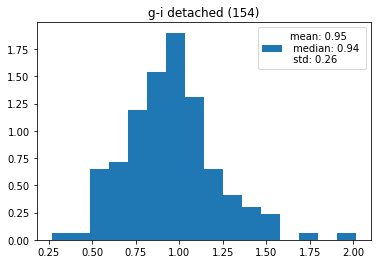

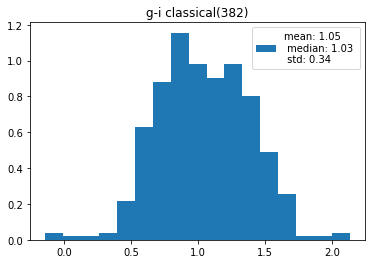

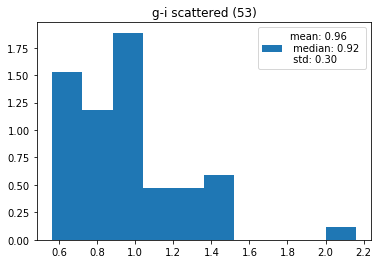

In [8]:
mean_gi_det = np.mean(gi_detached)
median_gi_det = np.median(gi_detached)
std_gi_det = np.std(gi_detached)

fig = plt.figure()
_ = plt.hist(gi_detached, bins='auto', density=True, label=f"mean: {mean_gi_det:.2f} \n median: {median_gi_det:.2f} \n std: {std_gi_det:.2f}")
plt.legend()
plt.title(f"g-i detached ({len(detached)})")
#pp.savefig(fig)


mean_gi_cla = np.mean(gi_classical)
median_gi_cla = np.median(gi_classical)
std_gi_cla = np.std(gi_classical)

fig = plt.figure()
_ = plt.hist(gi_classical, bins='auto', density=True, label=f"mean: {mean_gi_cla:.2f} \n median: {median_gi_cla:.2f} \n std: {std_gi_cla:.2f}")
plt.legend()
plt.title(f"g-i classical ({len(classical)})")
#pp.savefig(fig)

mean_gi_sca = np.mean(gi_scattered)
median_gi_sca = np.median(gi_scattered)
std_gi_sca = np.std(gi_scattered)


fig = plt.figure()
_ = plt.hist(gi_scattered, bins='auto', density=True, label=f"mean: {mean_gi_sca:.2f} \n median: {median_gi_sca:.2f} \n std: {std_gi_sca:.2f}")
plt.legend()
plt.title(f"g-i scattered ({len(scattered)})")
#pp.savefig(fig)


In [9]:
# Define probabilities of parent populations

#Classical
hist1 = np.histogram(gi_classical, bins='auto', density=True)
hist_dist1 = scipy.stats.rv_histogram(hist1)

#scattered
hist2 = np.histogram(gi_scattered, bins='auto', density=True)
hist_dist2 = scipy.stats.rv_histogram(hist2)


In [10]:
# Likehood ratio of parent populations
def ratio_parent_populations(samples):
    # ratio of two probability distributions defined above
    r = hist_dist1.pdf(samples)/hist_dist2.pdf(samples)
    # Some 'inf' result from above...
    mask = np.isinf(r)
    return r[~mask]

In [19]:
n_realizations=10000
n_samples_array = range(5,40) #[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

d1=[] # hist_dist1, classical
d2=[] # hist_dist2, scattered

threshold_d1_5=[] #5th percentile
threshold_d2_95=[] #95th percentile

for n_samples in n_samples_array:
    print (n_samples)
    d1=[]
    d2=[]
    for i in range(n_realizations):
        samples1 = hist_dist1.rvs(size=n_samples)
        d1.append(np.prod(ratio_parent_populations(samples1)))
        samples2 = hist_dist2.rvs(size=n_samples)
        d2.append(np.prod(ratio_parent_populations(samples2)))


    d1 = np.array(d1)
    d2 = np.array(d2)

    print ("d1: ", np.mean(d1), np.median(d1), np.std(d1))
    print ("d2: ", np.mean(d2), np.median(d2), np.std(d2))
  
    d1_per_5 = np.percentile(d1, 5)
    d2_per_95 = np.percentile(d2, 95)
    print ("d1, 5" , d1_per_5)
    print ("d2, 95", d2_per_95)
    
    threshold_d1_5.append(d1_per_5)
    threshold_d2_95.append(d2_per_95)

5


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


d1:  2.129336987597036 1.0654750043177066 3.243416616868832
d2:  0.468208758615523 0.2057662063225119 0.8944640036333047
d1, 5 0.14980089251649983
d2, 95 1.7154395795668442
6
d1:  2.448157090086483 1.0780044337109889 4.269535939302979
d2:  0.3766443116792795 0.14378624563376297 0.8419849137336058
d1, 5 0.12267836959918374
d2, 95 1.4013809316341466
7
d1:  2.779804303153158 1.1116057556813423 5.000917435781093
d2:  0.35384435477400233 0.10978538771265428 1.110462900363671
d1, 5 0.09821398516243238
d2, 95 1.3186921085769034
8
d1:  3.3742175826641687 1.1009106059244997 7.511722203169471
d2:  0.2919635259435194 0.08074040113661193 0.8353069919296303
d1, 5 0.08712325302348052
d2, 95 1.1563311734646373
9
d1:  3.6637481169668944 1.0771770562132192 8.869856232420878
d2:  0.2705954240745101 0.05753325823309376 1.328844943515195
d1, 5 0.07468696669298185
d2, 95 0.9903765320845039
10
d1:  4.618375830645164 1.1486464811608488 12.625434882413511
d2:  0.2176547233158198 0.041418804205268375 0.8191786

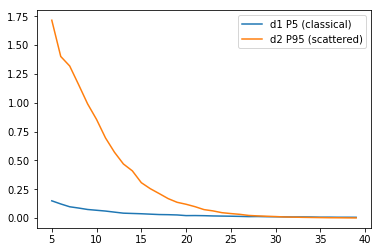

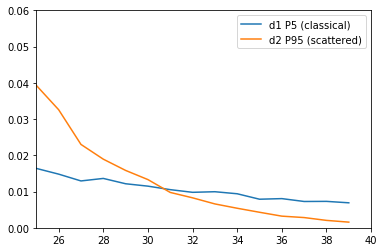

In [24]:
fig = plt.figure()
plt.plot(n_samples_array, threshold_d1_5, label='d1 P5 (classical)')
plt.plot(n_samples_array, threshold_d2_95, label='d2 P95 (scattered)')
plt.legend()

fig = plt.figure()
plt.plot(n_samples_array, threshold_d1_5, label='d1 P5 (classical)')
plt.plot(n_samples_array, threshold_d2_95, label='d2 P95 (scattered)')
plt.xlim([25,40])
plt.ylim([0., 0.06])
plt.legend()